# Homework 6
Ronan Perry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
from collections import defaultdict

In [2]:
def fhat(x,y,d):    
    X = np.asarray([[xi**k for k in range(d)] for xi in x])
    estimates = X @ np.linalg.pinv(X) @ np.asarray(y).T
    return estimates

In [3]:
def sample_pts(n, func, test=False, sigma=1):
    if test:
        x = np.random.uniform(-1, 1, n)
    else:
        width = np.random.uniform(0, (2) / n)
        start = np.random.uniform(-1, 1 - width*n)
        x = np.arange(start, start+(n-0.5)*width, width)
        
    y = func(x) + np.random.normal(0,sigma,n)
    return (x,y)

In [8]:
def mse1(n,d,func, test=False, sigma=1):
    x,y = sample_pts(n,func,test=False,sigma=sigma)
    return 1/n*np.linalg.norm(func(x) - fhat(x,y,d))**2

def mse2(n,d,func, sigma=1):
    x,y = sample_pts(n,func,test=True, sigma=sigma)
    return 1/n*np.linalg.norm(func(x) - fhat(x,y,d))**2

## Q3

In [5]:
f1 = lambda x: np.exp(-x)
f2 = lambda x: 1/(1+x**2)

In [13]:
ns = [30,50,100,250,500,1000,2000]
ds = [10,20,50,100]
sigmas = [0.5,1,2,3]

In [14]:
# Values to calculate MSE for
grid = product(ns, ds, sigmas)
grid = [g for g in grid if g[0] >= g[1]]

### MSE 1 F 1

In [15]:
mse1_f1 = defaultdict(lambda : defaultdict(dict))
n_runs = 5

for n,d,sigma in grid:
    mse1_f1[d][sigma][n] = []

for _ in range(n_runs):
    for n,d,sigma in grid:
        mse1_f1[d][sigma][n].append(mse1(n,d,f1,sigma=sigma))

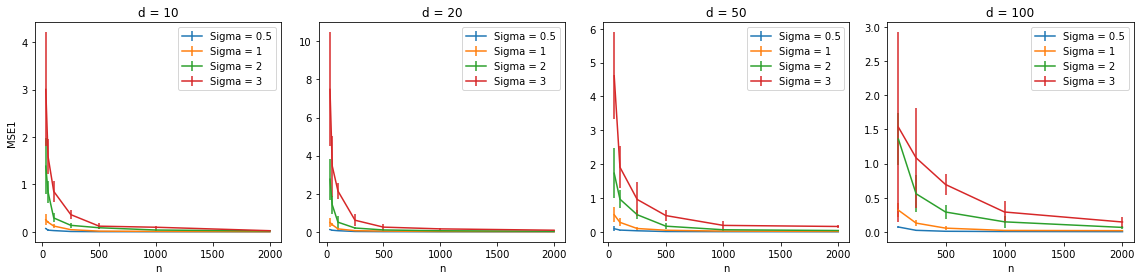

In [16]:
fig,axes = plt.subplots(1,len(ds),figsize=(4*len(ds),4))
for i,ax in enumerate(axes):
    d = ds[i]
    for sigma in sigmas:
        x = list(mse1_f1[d][sigma].keys())
        ys = list(mse1_f1[d][sigma].values())
        y_avg = np.mean(ys, axis=1)
        y_std = np.std(ys, axis=1)
        ax.errorbar(x,y_avg,yerr=y_std,label=f'Sigma = {sigma}')
    ax.legend()
    ax.set_xlabel('n')
    if i == 0:
        ax.set_ylabel('MSE1')
    ax.set_title(f'd = {d}')

plt.tight_layout()
plt.savefig('HW6_Plots/mse1_f1.png')
plt.show()

### MSE 1 F2

In [17]:
mse1_f2 = defaultdict(lambda : defaultdict(dict))
n_runs = 5

for n,d,sigma in grid:
    mse1_f2[d][sigma][n] = []

for _ in range(n_runs):
    for n,d,sigma in grid:
        mse1_f2[d][sigma][n].append(mse1(n,d,f2,sigma=sigma))

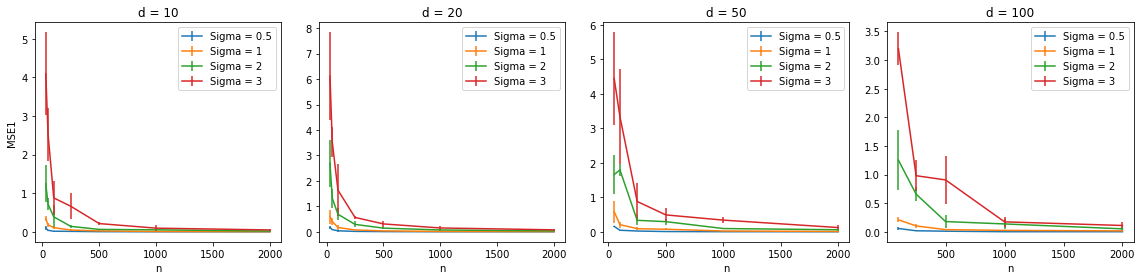

In [18]:
fig,axes = plt.subplots(1,len(ds),figsize=(4*len(ds),4))
for i,ax in enumerate(axes):
    d = ds[i]
    for sigma in sigmas:
        x = list(mse1_f2[d][sigma].keys())
        ys = list(mse1_f2[d][sigma].values())
        y_avg = np.mean(ys, axis=1)
        y_std = np.std(ys, axis=1)
        ax.errorbar(x,y_avg,yerr=y_std,label=f'Sigma = {sigma}')
    ax.legend()
    ax.set_xlabel('n')
    if i == 0:
        ax.set_ylabel('MSE1')
    ax.set_title(f'd = {d}')

plt.tight_layout()
plt.savefig('HW6_Plots/mse1_f2.png')
plt.show()

### MSE2 F1

In [19]:
mse2_f1 = defaultdict(lambda : defaultdict(dict))
n_runs = 5

for n,d,sigma in grid:
    mse2_f1[d][sigma][n] = []

for _ in range(n_runs):
    for n,d,sigma in grid:
        mse2_f1[d][sigma][n].append(mse2(n,d,f1,sigma=sigma))

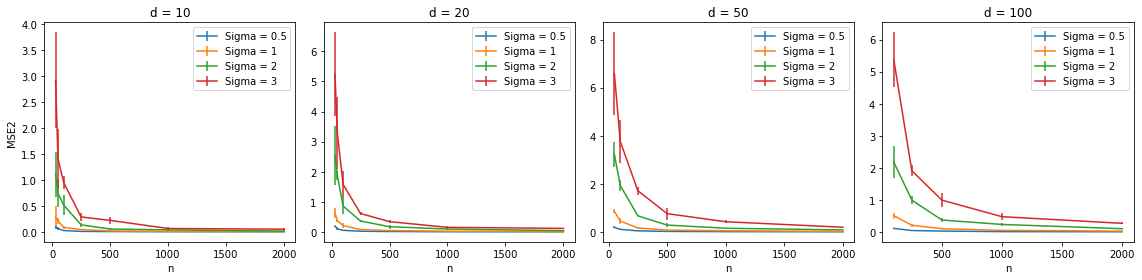

In [20]:
fig,axes = plt.subplots(1,len(ds),figsize=(4*len(ds),4))
for i,ax in enumerate(axes):
    d = ds[i]
    for sigma in sigmas:
        x = list(mse2_f1[d][sigma].keys())
        ys = list(mse2_f1[d][sigma].values())
        y_avg = np.mean(ys, axis=1)
        y_std = np.std(ys, axis=1)
        ax.errorbar(x,y_avg,yerr=y_std,label=f'Sigma = {sigma}')
    ax.legend()
    ax.set_xlabel('n')
    if i == 0:
        ax.set_ylabel('MSE2')
    ax.set_title(f'd = {d}')

plt.tight_layout()
plt.savefig('HW6_Plots/mse2_f1.png')
plt.show()

### MSE2 F2

In [21]:
mse2_f2 = defaultdict(lambda : defaultdict(dict))
n_runs = 5

for n,d,sigma in grid:
    mse2_f2[d][sigma][n] = []

for _ in range(n_runs):
    for n,d,sigma in grid:
        mse2_f2[d][sigma][n].append(mse2(n,d,f2,sigma=sigma))

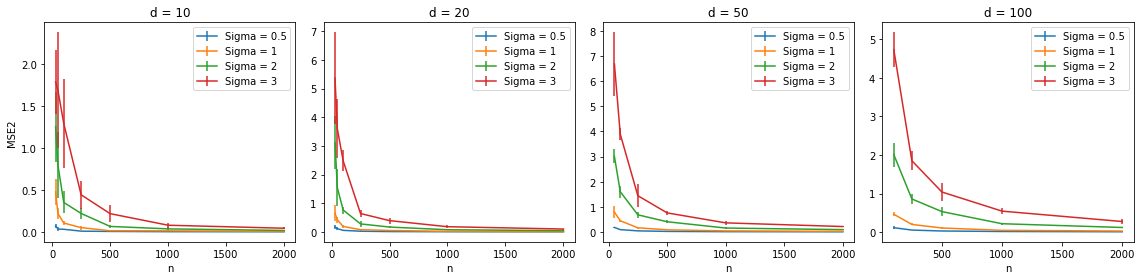

In [22]:
fig,axes = plt.subplots(1,len(ds),figsize=(4*len(ds),4))
for i,ax in enumerate(axes):
    d = ds[i]
    for sigma in sigmas:
        x = list(mse2_f2[d][sigma].keys())
        ys = list(mse2_f2[d][sigma].values())
        y_avg = np.mean(ys, axis=1)
        y_std = np.std(ys, axis=1)
        ax.errorbar(x,y_avg,yerr=y_std,label=f'Sigma = {sigma}')
    ax.legend()
    ax.set_xlabel('n')
    if i == 0:
        ax.set_ylabel('MSE2')
    ax.set_title(f'd = {d}')

plt.tight_layout()
plt.savefig('HW6_Plots/mse2_f2.png')
plt.show()

### n vs d

In [23]:
ns = [100,500,1000,2500,5000]
ds = [int(n**(1/3)) for n in ns]

n_runs = 5

mse1f1 = [[mse1(n,d,f1) for n,d in zip(ns,ds)] for _ in range(n_runs)]
mse1f2 = [[mse1(n,d,f2) for n,d in zip(ns,ds)] for _ in range(n_runs)]
mse2f1 = [[mse2(n,d,f1) for n,d in zip(ns,ds)] for _ in range(n_runs)]
mse2f2 = [[mse2(n,d,f2) for n,d in zip(ns,ds)] for _ in range(n_runs)]

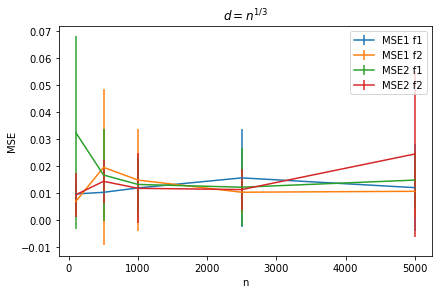

In [24]:
fig,axes = plt.subplots(figsize=(6,4))

plt.errorbar(ns, np.mean(mse1f1, axis=1), yerr=np.std(mse1f1, axis=1), label='MSE1 f1')
plt.errorbar(ns, np.mean(mse1f2, axis=1), yerr=np.std(mse1f2, axis=1), label='MSE1 f2')
plt.errorbar(ns, np.mean(mse2f1, axis=1), yerr=np.std(mse2f1, axis=1), label='MSE2 f1')
plt.errorbar(ns, np.mean(mse2f2, axis=1), yerr=np.std(mse2f2, axis=1), label='MSE2 f2')

plt.legend(loc='upper right')
plt.title('$d = n^{1/3}$')
plt.tight_layout()
plt.xlabel('n')
plt.ylabel('MSE')
plt.savefig('HW6_Plots/n_vs_d.png')
plt.show()